In [ ]:
import pandas as pd
import numpy as np
import warnings
import networkx as nx
import matplotlib.pyplot as plt
import folium
import requests

warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:.2f}'.format)

# Подготовка данных

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Тестовое антифрод-аналитик/Тестовое_задание_2_Антифрод_аналитик.xlsx',
              parse_dates=['Operation created at Date'])

In [ ]:
data.head()

,Provider ID,Operation ID,Payment ID,Operation Type,Operation Status,Secure 3ds Check,Channel Amount,Channel Currency,Operation created at Date,Payment Method Type,Account Number,Merchant ID,Project ID,Customer ID,Customer Email,Card Holder,Issuer Country Name,Country By IP Name,Customer IP V4 V6,Issuer Bank Name
0,4781.00,99892010097211,6021093719,sale,success,1.00,1000.00,RUB,2022-03-30,visa,427626******5062,39,321,3753071,avtomr@yandex.ru,LEONID PROKHOROV,Russian Federation,Russian Federation,176.59.134.184,SBERBANK of Russia
1,1293.00,99888010096111,347788572,sale,success,NaN,51.00,EUR,2022-02-27,visa,434597******0730,1581,5771,95022,williahmalexdelaplaza@gmail.com,WILLIAHM ALEX DE LA PLAZA,Denmark,Denmark,62.198.132.139,Jyske Bank A/S
2,1293.00,99888010096101,347788572,sale,decline,NaN,51.00,EUR,2022-02-27,visa,434597******0730,1581,5771,95022,williahmalexdelaplaza@gmail.com,WILLIAHM ALEX DE LA PLAZA,Denmark,Denmark,62.198.132.139,Jyske Bank A/S
3,1293.00,99888010096091,347788572,sale,decline,NaN,51.00,EUR,2022-02-27,visa,434597******0730,1581,5771,95022,williahmalexdelaplaza@gmail.com,WILLIAHM ALEX DE LA PLAZA,Denmark,Denmark,62.198.132.139,Jyske Bank A/S
4,1293.00,99888010096081,347788572,sale,decline,NaN,51.00,EUR,2022-02-27,visa,434597******0730,1581,5771,95022,williahmalexdelaplaza@gmail.com,WILLIAHM ALEX DE LA PLAZA,Denmark,Denmark,62.198.132.139,Jyske Bank A/S


In [ ]:
data.loc[data.duplicated()]

,Provider ID,Operation ID,Payment ID,Operation Type,Operation Status,Secure 3ds Check,Channel Amount,Channel Currency,Operation created at Date,Payment Method Type,Account Number,Merchant ID,Project ID,Customer ID,Customer Email,Card Holder,Issuer Country Name,Country By IP Name,Customer IP V4 V6,Issuer Bank Name


In [ ]:
data.loc[data.duplicated(subset=['Operation ID'])]

,Provider ID,Operation ID,Payment ID,Operation Type,Operation Status,Secure 3ds Check,Channel Amount,Channel Currency,Operation created at Date,Payment Method Type,Account Number,Merchant ID,Project ID,Customer ID,Customer Email,Card Holder,Issuer Country Name,Country By IP Name,Customer IP V4 V6,Issuer Bank Name


Дубликатов в данных нет, посмотрим на типы колонок и пропущенные значения

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13575 entries, 0 to 13574
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Provider ID                13220 non-null  float64       
 1   Operation ID               13575 non-null  int64         
 2   Payment ID                 13575 non-null  object        
 3   Operation Type             13575 non-null  object        
 4   Operation Status           13575 non-null  object        
 5   Secure 3ds Check           1209 non-null   float64       
 6   Channel Amount             13572 non-null  float64       
 7   Channel Currency           13562 non-null  object        
 8   Operation created at Date  13575 non-null  datetime64[ns]
 9   Payment Method Type        13568 non-null  object        
 10  Account Number             13200 non-null  object        
 11  Merchant ID                13575 non-null  int64         
 12  Proj

In [ ]:
data[data['Provider ID'].isna()].head()

,Provider ID,Operation ID,Payment ID,Operation Type,Operation Status,Secure 3ds Check,Channel Amount,Channel Currency,Operation created at Date,Payment Method Type,Account Number,Merchant ID,Project ID,Customer ID,Customer Email,Card Holder,Issuer Country Name,Country By IP Name,Customer IP V4 V6,Issuer Bank Name
35,NaN,99498010092461,25953551785cc75d953c2945ef8681d5,sale,decline,NaN,9.69,EUR,2022-01-23,mastercard,549701******6697,278,22431,8ba8aa0ac77133680329648aaad0109c,duuudin85@mail.ru,ALEKSEY SHISHKIN,Germany,Russian Federation,5.62.18.60,DEUTSCHER SPARKASSEN UND GIROV
53,NaN,99274010093791,332413928,sale,decline,NaN,21.65,EUR,2022-01-30,mastercard,553390******6644,1581,5771,133367,duuudin85@mail.ru,SEG FTJGN,Germany,Russian Federation,5.62.19.48,LUFTHANSA AIRPLUS SERVICEKARTE
58,NaN,99223010092971,332420905,sale,decline,NaN,21.65,EUR,2022-01-30,visa,402396******1013,1581,5771,133367,duuudin85@mail.ru,SEGXRHB DRTHB,United Kingdom,Russian Federation,5.62.19.48,Vanquis Bank Limited
95,NaN,98373010092031,ed92be95-d09d-4a2d-aaaa-3bbcacb121d4,sale,decline,NaN,11.00,USD,2022-01-23,mastercard,516622******9427,212,726,523927104ac252a76d599ac2c4a5eeb3d0855d6a7a8664...,duuudin85@mail.ru,ALEKSEY SHISHKIN,Ireland,Russian Federation,5.62.18.88,KBC BANK IRELAND PLC
137,NaN,97664010095871,294053,sale,decline,NaN,20.00,USD,2022-02-15,visa,400022******0608,46,433,352240,patrickgash8@gmail.com,ASHLEY FEIMSTER,United States,Kenya,197.237.199.160,Navy Federal Credit Union


In [ ]:
data['Operation Status'].value_counts()

,count
Operation Status,
decline,9040
success,4456
awaiting redirect result,32
external processing,25
external error,22


In [ ]:
data[data['Provider ID'].isna()]['Operation Status'].value_counts()

,count
Operation Status,
decline,352
success,3


In [ ]:
data[(data['Provider ID'].isna()) & (data['Operation Status'] == 'success')]

,Provider ID,Operation ID,Payment ID,Operation Type,Operation Status,Secure 3ds Check,Channel Amount,Channel Currency,Operation created at Date,Payment Method Type,Account Number,Merchant ID,Project ID,Customer ID,Customer Email,Card Holder,Issuer Country Name,Country By IP Name,Customer IP V4 V6,Issuer Bank Name
4494,NaN,5044436010102462,6018298451,manual change,success,NaN,NaN,NaN,2022-03-30,visa,489347******7352,39,321,8942209,fpasha@bk.ru,PAVEL FOMIN,Russian Federation,Russian Federation,176.59.102.246,VTB Bank PJSC
7339,NaN,5004597010100112,6018889158,manual change,success,NaN,NaN,NaN,2022-03-30,visa,489347******7352,39,321,8942209,fpasha@bk.ru,PAVEL FOMIN,Russian Federation,Russian Federation,176.59.102.246,VTB Bank PJSC
10341,NaN,19453010048751,6018838103,manual change,success,NaN,NaN,NaN,2022-03-30,visa,489347******7352,39,321,8942209,fpasha@bk.ru,PAVEL FOMIN,Russian Federation,Russian Federation,176.59.115.90,VTB Bank PJSC


Пропущенные значения в колонке Provider ID связаны с отменами транзакций и ручными изменениями, в которых провайдер, по всей видимости, не учвствует

In [ ]:
data[data['Channel Currency'].isna()]

,Provider ID,Operation ID,Payment ID,Operation Type,Operation Status,Secure 3ds Check,Channel Amount,Channel Currency,Operation created at Date,Payment Method Type,Account Number,Merchant ID,Project ID,Customer ID,Customer Email,Card Holder,Issuer Country Name,Country By IP Name,Customer IP V4 V6,Issuer Bank Name
810,1421.00,82975010097781,D318990709,customer action,success,NaN,0.00,NaN,2022-03-22,mobile,NaN,278,983,10275580,pakanela20@gmail.com,NaN,NaN,Kazakhstan,81.88.148.19,NaN
1180,1421.00,78024010096831,D319016023,customer action,success,NaN,0.00,NaN,2022-03-22,mobile,NaN,278,983,22183393,abdrahmanorken1@gmail.com,NaN,NaN,Kazakhstan,2.57.97.109,NaN
1182,1421.00,77996010097641,D319023317,customer action,success,NaN,0.00,NaN,2022-03-22,mobile,NaN,278,983,22208158,janabaimobil05@gmail.com,NaN,NaN,Kazakhstan,95.82.83.219,NaN
1944,1421.00,68407010090641,D319052057,customer action,success,NaN,0.00,NaN,2022-03-22,mobile,NaN,278,983,13536806,NaN,NaN,NaN,Kazakhstan,85.117.118.95,NaN
3275,1421.00,51889010090431,D319062462,customer action,success,NaN,0.00,NaN,2022-03-22,mobile,NaN,278,983,21745084,NaN,NaN,NaN,Kazakhstan,2.72.41.178,NaN
4494,NaN,5044436010102462,6018298451,manual change,success,NaN,NaN,NaN,2022-03-30,visa,489347******7352,39,321,8942209,fpasha@bk.ru,PAVEL FOMIN,Russian Federation,Russian Federation,176.59.102.246,VTB Bank PJSC
7339,NaN,5004597010100112,6018889158,manual change,success,NaN,NaN,NaN,2022-03-30,visa,489347******7352,39,321,8942209,fpasha@bk.ru,PAVEL FOMIN,Russian Federation,Russian Federation,176.59.102.246,VTB Bank PJSC
8592,1421.00,40380010062321,D319091381,customer action,success,NaN,0.00,NaN,2022-03-22,mobile,NaN,278,983,21960133,nadegdam87@mail.ru,NaN,NaN,Kazakhstan,95.57.149.49,NaN
9128,1421.00,33676010048241,D319078663,customer action,success,NaN,0.00,NaN,2022-03-22,mobile,NaN,278,983,13438787,alseitbejbarys@gmail.com,NaN,NaN,Kazakhstan,178.90.52.105,NaN
10157,1421.00,21806010048151,D319076314,customer action,success,NaN,0.00,NaN,2022-03-22,mobile,NaN,278,983,21954111,doszhanumirzakov@gmail.com,NaN,NaN,Kazakhstan,95.82.91.8,NaN


Пропущенные значения в Channel Currency связаны с действиями покупателей без переводов денежных средств или же ручными изменениями

Здесь также видны пропущенные значения в Channel Amount, что также связано с ручными изменениями

In [ ]:
data[data['Customer ID'].isna()]

,Provider ID,Operation ID,Payment ID,Operation Type,Operation Status,Secure 3ds Check,Channel Amount,Channel Currency,Operation created at Date,Payment Method Type,Account Number,Merchant ID,Project ID,Customer ID,Customer Email,Card Holder,Issuer Country Name,Country By IP Name,Customer IP V4 V6,Issuer Bank Name
258,1095.00,93885010093551,capitaller-transfer-b0462e3ce0a6e03d38a8614ade,commission,success,NaN,1.86,USD,2022-02-04,capitaller,495724090961,46,433,NaN,NaN,NaN,NaN,NaN,127.0.0.1,NaN
259,1095.00,93885010093541,capitaller-transfer-b0462e3ce0a6e03d38a8614ade,payout,success,NaN,44.64,USD,2022-02-04,capitaller,495724090961,46,433,NaN,NaN,NaN,NaN,NaN,127.0.0.1,NaN
292,2341.00,927010047101,6021208308,sale,awaiting redirect result,NaN,31.58,USD,2022-03-30,cup/bank,919726088@qq.com,39,321,NaN,919726088@qq.com,NaN,NaN,China,223.199.34.71,NaN
296,1095.00,92558010096161,capitaller-transfer-111e2bc075f4fc5035d80ddc53,commission,success,NaN,0.42,USD,2022-02-22,capitaller,495724090961,46,433,NaN,NaN,NaN,NaN,NaN,127.0.0.1,NaN
297,1095.00,92558010096151,capitaller-transfer-111e2bc075f4fc5035d80ddc53,payout,success,NaN,10.09,USD,2022-02-22,capitaller,495724090961,46,433,NaN,NaN,NaN,NaN,NaN,127.0.0.1,NaN
376,1095.00,90789010096781,capitaller-transfer-8e0d62ada09bbe339329f50a03,commission,success,NaN,1.23,USD,2022-03-03,capitaller,495724090961,46,433,NaN,NaN,NaN,NaN,NaN,127.0.0.1,NaN
377,1095.00,90789010096771,capitaller-transfer-8e0d62ada09bbe339329f50a03,payout,success,NaN,29.58,USD,2022-03-03,capitaller,495724090961,46,433,NaN,NaN,NaN,NaN,NaN,127.0.0.1,NaN
1144,1095.00,78449010096471,capitaller-transfer-77b17ef6ada45d43cece7705ac,commission,success,NaN,1.24,USD,2022-03-03,capitaller,495724090961,46,433,NaN,NaN,NaN,NaN,NaN,127.0.0.1,NaN
1145,1095.00,78449010096461,capitaller-transfer-77b17ef6ada45d43cece7705ac,payout,success,NaN,29.72,USD,2022-03-03,capitaller,495724090961,46,433,NaN,NaN,NaN,NaN,NaN,127.0.0.1,NaN
1530,1095.00,73291010095231,capitaller-transfer-5bb0abf577b1e626e2beb4f6fc,commission,success,NaN,1.82,USD,2022-02-21,capitaller,495724090961,46,433,NaN,NaN,NaN,NaN,NaN,127.0.0.1,NaN


Пропуски в колонке Customer ID связаны с выводами денежных средств и комиссиями. Предполагаю, это связано с взаимодействием одного конкретного мерчанта напрямую с платформой или платежной системой.  

Также есть одна продажа с отсутствующим Customer ID, что скорее всего связано с багом, однако в нашем случае единичный баг не повлияет на анализ, так как нам необходимо рассмытривать множественные случаи фрода со стороны покупателей, поэтому, за неименеем точной информации о том, является ли это багом или особенностью конкретного платежа, я оставлю данную продажу в датасете.



# Кардинг

Рассмотрим наиболее крупных мерчантов

In [ ]:
data.groupby('Merchant ID').agg(
    {
        'Project ID': 'nunique',
        'Customer ID': 'nunique',
        'Provider ID': 'count'
    }
).sort_values('Customer ID', ascending=False) \
.rename(columns = {'Project ID': 'projects count', 'Customer ID': 'unique customers', 'Provider ID': 'transactions'})

,projects count,unique customers,transactions
Merchant ID,,,
278,3,1798,2421
212,16,1301,2484
39,1,828,2497
46,2,627,2742
1581,3,175,2859
300,1,70,159
2901,1,1,21
4011,1,1,2
6841,1,1,35


Самый крупный мерчант с id 278 - у него 3 проекта с 1798 покупателями.

При этом есть мерчант 1581, у которого небольшое количество уникальных покупателей, но при этом самое большое количество транзакций, что выглядит достаточно подозрительно, вернемся к нему позже, для начала рассмотрим мерчанта с самым большим числом уникальных пользователей.

Выделим данные мерчанта 278 в отдельный датасет и попробуем его исследовать. Для начала посмотрим, есть ли подозрительные ip-адреса с большим числом транзакций

In [ ]:
data_278 = data[data['Merchant ID'] == 278]
data_278.groupby('Customer IP V4 V6', as_index=False)['Operation ID'].count().sort_values('Operation ID', ascending=False).head()

,Customer IP V4 V6,Operation ID
1070,82.194.19.139,22
958,5.62.18.88,16
1621,95.82.118.4,9
1013,79.133.185.94,8
957,5.62.18.60,7


In [ ]:
data_278[data_278['Customer IP V4 V6'] == '82.194.19.139']

,Provider ID,Operation ID,Payment ID,Operation Type,Operation Status,Secure 3ds Check,Channel Amount,Channel Currency,Operation created at Date,Payment Method Type,Account Number,Merchant ID,Project ID,Customer ID,Customer Email,Card Holder,Issuer Country Name,Country By IP Name,Customer IP V4 V6,Issuer Bank Name
1543,1293.00,73134010097641,9e582e8369fce444df185753b295927b,sale,decline,NaN,1.60,EUR,2022-03-22,visa,416973******2637,278,26751,25bd95c5e59579a480a159648734ffca,sonavaliyeva1956@gmail.com,SAVALAN MAMMADOV,Azerbaijan,Azerbaijan,82.194.19.139,Kapital Bank JSB
1544,1293.00,73134010097611,9e582e8369fce444df185753b295927b,sale,decline,NaN,1.60,EUR,2022-03-22,visa,416973******2637,278,26751,25bd95c5e59579a480a159648734ffca,sonavaliyeva1956@gmail.com,SAVALAN MAMMADOV,Azerbaijan,Azerbaijan,82.194.19.139,Kapital Bank JSB
2518,1293.00,61410010090251,51a1afc685ea29157645507f332d3748,sale,decline,NaN,1.60,EUR,2022-03-22,visa,416973******2637,278,26751,25bd95c5e59579a480a159648734ffca,sonavaliyeva1956@gmail.com,SAVALAN MAMMADOV,Azerbaijan,Azerbaijan,82.194.19.139,Kapital Bank JSB
2519,1293.00,61410010090211,51a1afc685ea29157645507f332d3748,sale,decline,NaN,1.60,EUR,2022-03-22,visa,416973******2637,278,26751,25bd95c5e59579a480a159648734ffca,sonavaliyeva1956@gmail.com,SAVALAN MAMMADOV,Azerbaijan,Azerbaijan,82.194.19.139,Kapital Bank JSB
2520,1293.00,61410010090191,51a1afc685ea29157645507f332d3748,sale,decline,NaN,1.60,EUR,2022-03-22,visa,416973******2637,278,26751,25bd95c5e59579a480a159648734ffca,sonavaliyeva1956@gmail.com,SAVALAN MAMMADOV,Azerbaijan,Azerbaijan,82.194.19.139,Kapital Bank JSB
2521,1293.00,61410010090141,51a1afc685ea29157645507f332d3748,sale,decline,NaN,1.60,EUR,2022-03-22,visa,416973******2637,278,26751,25bd95c5e59579a480a159648734ffca,sonavaliyeva1956@gmail.com,SAVALAN MAMMADOV,Azerbaijan,Azerbaijan,82.194.19.139,Kapital Bank JSB
2705,1293.00,58939010092131,5832dfff07fe34ef7a89ddfee0f7f82c,sale,decline,NaN,1.60,EUR,2022-03-22,visa,416973******2637,278,26751,25bd95c5e59579a480a159648734ffca,sonavaliyeva1956@gmail.com,SAVALAN MAMMADOV,Azerbaijan,Azerbaijan,82.194.19.139,Kapital Bank JSB
2706,1293.00,58939010092121,5832dfff07fe34ef7a89ddfee0f7f82c,sale,decline,NaN,1.60,EUR,2022-03-22,visa,416973******2637,278,26751,25bd95c5e59579a480a159648734ffca,sonavaliyeva1956@gmail.com,SAVALAN MAMMADOV,Azerbaijan,Azerbaijan,82.194.19.139,Kapital Bank JSB
2725,1293.00,58654010091291,9eed79ca3c51a370d0b9e02cea6456a7,sale,decline,NaN,1.60,EUR,2022-03-22,visa,416973******2637,278,26751,25bd95c5e59579a480a159648734ffca,sonavaliyeva1956@gmail.com,SAVALAN MAMMADOV,Azerbaijan,Azerbaijan,82.194.19.139,Kapital Bank JSB
2726,1293.00,58654010091271,9eed79ca3c51a370d0b9e02cea6456a7,sale,decline,NaN,1.60,EUR,2022-03-22,visa,416973******2637,278,26751,25bd95c5e59579a480a159648734ffca,sonavaliyeva1956@gmail.com,SAVALAN MAMMADOV,Azerbaijan,Azerbaijan,82.194.19.139,Kapital Bank JSB


Пользователи данного ip-адреса пытались провести оплату с одной карты на одну и ту же сумму, однако при оплате реквизиты (имя) менялись, что выглядит достаточно подозрительно, так как вряд ли можно забыть информацию о том, кто является владельцем карты, но с большей вероятностью это все же попытка провести платеж м непониманием, почему он отклоняется.

Но, на всякий случай, проверим другие транзакции (в том числе у других мерчантов), связанные с данными покупателями.

In [ ]:
ip = '82.194.19.139'
card = '416973******2637'
customers = data_278[data_278['Customer IP V4 V6'] == '82.194.19.139']['Customer ID'].unique().tolist()
emails = data_278[data_278['Customer IP V4 V6'] == '82.194.19.139']['Customer Email'].unique().tolist()
names = data_278[data_278['Customer IP V4 V6'] == '82.194.19.139']['Card Holder'].unique().tolist()

print(f"Кол-во транзакций для ip всем датасете: {data[data['Customer IP V4 V6'] == ip].shape[0]}",
      f"У мерчанта 278: {data_278[data_278['Customer IP V4 V6'] == ip].shape[0]}",
      f"\n",
      f"Кол-во транзакций по карте во всем датасете: {data[data['Account Number'] == card].shape[0]}",
      f"У мерчанта 278: {data_278[data_278['Account Number'] == card].shape[0]}",
      f"\n",
      f"Кол-во транзакций покупателей в проектк: {data_278[(data_278['Customer ID'].isin(customers)) & (data_278['Project ID'] == 26751)].shape[0]}",
      f"Кол-во транзакций с аналогичными почтами во всем датасете: {data[data['Customer Email'].isin(emails)].shape[0]}",
      f"Кол-во транзакций с аналогичными именами во всем датасете: {data[data['Card Holder'].isin(names)].shape[0]}",
      sep='\n')

Кол-во транзакций для ip всем датасете: 22
У мерчанта 278: 22


Кол-во транзакций по карте во всем датасете: 22
У мерчанта 278: 22


Кол-во транзакций покупателей в проектк: 22
Кол-во транзакций с аналогичными почтами во всем датасете: 22
Кол-во транзакций с аналогичными именами во всем датасете: 22


Так как для данных пользователей и их реквизитов больше нет подозрительной активности, с большой вероятностью данные транзакции не являются фродоовыми.

Есть еще один ip с достаточно большим числом транзакций

In [ ]:
data_278[data_278['Customer IP V4 V6'] == '5.62.18.88']

,Provider ID,Operation ID,Payment ID,Operation Type,Operation Status,Secure 3ds Check,Channel Amount,Channel Currency,Operation created at Date,Payment Method Type,Account Number,Merchant ID,Project ID,Customer ID,Customer Email,Card Holder,Issuer Country Name,Country By IP Name,Customer IP V4 V6,Issuer Bank Name
59,1293.00,99159010092451,b42243e51e8ed182db2420917a9df78e,sale,decline,NaN,9.69,EUR,2022-01-23,mastercard,519348******5346,278,26751,8ba8aa0ac77133680329648aaad0109c,duuudin85@mail.ru,ALEKSEY SHISHKIN,Peru,Russian Federation,5.62.18.88,BBVA BANCO CONTINENTAL
204,1293.00,95906010092631,0883f1fe108c7a51601aadd20734a02b,sale,decline,NaN,9.69,EUR,2022-01-23,mastercard,511842******3156,278,26751,8ba8aa0ac77133680329648aaad0109c,duuudin85@mail.ru,ALEKSEY SHISHKIN,Peru,Russian Federation,5.62.18.88,SCOTIABANK PERU S.A.A.
675,1293.00,84885010092801,61392d19a2dba12c2eea0e334feb7992,sale,decline,NaN,9.69,EUR,2022-01-23,mastercard,529205******0193,278,26751,8ba8aa0ac77133680329648aaad0109c,duuudin85@mail.ru,ALEKSEY SHISHKIN,Brazil,Russian Federation,5.62.18.88,ACESSO SOLUCOES DE PAGAMENTO S
786,1293.00,83252010092951,1be2cc16688302455674a3596c5acb94,sale,decline,NaN,9.69,EUR,2022-01-23,mastercard,530780******3508,278,26751,8ba8aa0ac77133680329648aaad0109c,duuudin85@mail.ru,ALEKSEY SHISHKIN,Brazil,Russian Federation,5.62.18.88,ITAU UNIBANCO S.A.
1349,1293.00,7582010042841,d6e8eeab3f7f2a6df3783cb24d322470,sale,decline,NaN,9.69,EUR,2022-01-23,mastercard,548984******0221,278,26751,8ba8aa0ac77133680329648aaad0109c,duuudin85@mail.ru,ALEKSEY SHISHKIN,Brazil,Russian Federation,5.62.18.88,ITAU UNIBANCO S.A.
2482,NaN,61958010085941,0f328b0a8281050e24583e3bd7346da4,sale,decline,NaN,9.69,EUR,2022-01-23,mastercard,540187******4837,278,22431,8ba8aa0ac77133680329648aaad0109c,duuudin85@mail.ru,ALEKSEY SHISHKIN,Germany,Russian Federation,5.62.18.88,ADVANZIA BANK S.A.
3253,NaN,52227010084481,1f0a9c97ea3c5e0fd59e069a32ece9ce,sale,decline,NaN,9.69,EUR,2022-01-23,mastercard,535586******6850,278,22431,8ba8aa0ac77133680329648aaad0109c,duuudin85@mail.ru,ALEKSEY SHISHKIN,Germany,Russian Federation,5.62.18.88,N26 GMBH
3363,1293.00,50821010084851,ed5b7f177d524e2d8cd0e99fc98d8a4c,sale,decline,NaN,9.69,EUR,2022-01-23,mastercard,529205******9414,278,26751,8ba8aa0ac77133680329648aaad0109c,duuudin85@mail.ru,ALEKSEY SHISHKIN,Brazil,Russian Federation,5.62.18.88,ACESSO SOLUCOES DE PAGAMENTO S
8585,NaN,40463010055751,1a2f630ada3a5efb5a58da5356c1feec,sale,decline,NaN,9.69,EUR,2022-01-23,mastercard,540187******9217,278,22431,8ba8aa0ac77133680329648aaad0109c,duuudin85@mail.ru,ALEKSEY SHISHKIN,Germany,Russian Federation,5.62.18.88,ADVANZIA BANK S.A.
8780,1293.00,3798010042541,72da3784fbdf4f283151800966803290,sale,decline,NaN,9.69,EUR,2022-01-23,mastercard,511842******8707,278,26751,8ba8aa0ac77133680329648aaad0109c,duuudin85@mail.ru,ALEKSEY SHISHKIN,Peru,Russian Federation,5.62.18.88,SCOTIABANK PERU S.A.A.


Данный пользователь выглядит уже достаточно подозрительно, так как с совершает транзакции с одного ip, но с разных карт, зарегистрированных в разных странах.

Анализ (за кадром) показал, что у полльзователя с почтой duuudin85@mail.ru множество транзакций у разных мерчантов с разными именами, странами и картами, 3 из которых являются успешными. Успешные транзакции произведены с одной карты на общую сумму более 160 евро

In [ ]:
data.groupby('Customer Email', as_index=False).agg({'Operation ID': 'count'}).sort_values('Operation ID', ascending=False).head(10)

,Customer Email,Operation ID
1963,payway.system@gmail.com,2322
858,duuudin85@mail.ru,869
700,cyrilredesigns@outlook.com,181
1882,odin.schultze@gmail.com,169
2366,sukronr370@gmail.com,152
2603,williahmalexdelaplaza@gmail.com,126
1400,kiesha17@gmail.com,108
0,*masked*,94
1420,klejevskijlesek@gmail.com,89
1298,joelai90@yahoo.com,82


In [ ]:
data[data['Customer Email'] == 'duuudin85@mail.ru']['Country By IP Name'].value_counts()

,count
Country By IP Name,
Russian Federation,442
Denmark,197
Germany,103
Kazakhstan,91
Jamaica,33
Canada,3


In [ ]:
data[data['Customer Email'] == 'duuudin85@mail.ru']['Operation Status'].value_counts()

,count
Operation Status,
decline,866
success,3


In [ ]:
data[(data['Customer Email'] == 'duuudin85@mail.ru') & (data['Operation Status'] == 'success')]

,Provider ID,Operation ID,Payment ID,Operation Type,Operation Status,Secure 3ds Check,Channel Amount,Channel Currency,Operation created at Date,Payment Method Type,Account Number,Merchant ID,Project ID,Customer ID,Customer Email,Card Holder,Issuer Country Name,Country By IP Name,Customer IP V4 V6,Issuer Bank Name
3494,1431.00,5058235010094472,332970888,sale,success,NaN,81.84,EUR,2022-01-31,mastercard,520741******8005,1581,5771,133367,duuudin85@mail.ru,ASEGXRB DRHCN,Jordan,Denmark,95.174.65.147,BLOM BANK SAL
4510,1431.00,5043873010093652,332969453,sale,success,NaN,58.74,EUR,2022-01-31,mastercard,520741******8005,1581,5771,133367,duuudin85@mail.ru,SRGHB EDRHTN,Jordan,Denmark,95.174.65.147,BLOM BANK SAL
7241,1431.00,5005901010091822,332967636,sale,success,NaN,21.79,EUR,2022-01-31,mastercard,520741******8005,1581,5771,133367,duuudin85@mail.ru,SRGXB DRHFN,Jordan,Denmark,95.174.65.147,BLOM BANK SAL


Проверим также связи карт с другими почтами, возможно фродовые транзакции совершались также через аккаунты с другими привязанными электронными почтами, а также связи этих почт с другими картами - и так пока не исчерпаем все связи почт и карт

In [ ]:
initial_email = 'duuudin85@mail.ru'

all_emails = set([initial_email])
all_card_numbers = set(data[data['Customer Email'] == initial_email]['Account Number'])

def find_related_emails(card_numbers):
    related_emails = set()
    for card in card_numbers:
        emails_for_card = data[data['Account Number'] == card]['Customer Email'].unique()
        related_emails.update(emails_for_card)
    return related_emails

while True:
    related_emails = find_related_emails(all_card_numbers)
    new_emails = related_emails - all_emails
    if not new_emails:
        break

    all_emails.update(new_emails)
    new_card_numbers = set(data[data['Customer Email'].isin(new_emails)]['Account Number'])
    all_card_numbers.update(new_card_numbers)

print("Все связанные email:")
print(all_emails)

Все связанные email:
{'stamatevalentinpetrisor@gmail.com', 'gergo11666@gmail.com', 'duuudin85@mail.ru'}


In [ ]:
data[data['Customer Email'] == 'stamatevalentinpetrisor@gmail.com']

,Provider ID,Operation ID,Payment ID,Operation Type,Operation Status,Secure 3ds Check,Channel Amount,Channel Currency,Operation created at Date,Payment Method Type,Account Number,Merchant ID,Project ID,Customer ID,Customer Email,Card Holder,Issuer Country Name,Country By IP Name,Customer IP V4 V6,Issuer Bank Name
4123,1941.00,5049812010096782,347433694,sale,success,NaN,33.82,USD,2022-02-26,mastercard,516383******5571,1581,5771,28089,stamatevalentinpetrisor@gmail.com,VALENTIN PETRISOR STAMATE,Spain,Spain,104.28.88.125,BANCO SANTANDER S.A.
5404,1941.00,5030465010096592,347432474,sale,decline,NaN,33.82,USD,2022-02-26,mastercard,516383******5571,1581,5771,28089,stamatevalentinpetrisor@gmail.com,VALENTIN PETRISOR STAMATE,Spain,Spain,104.28.88.129,BANCO SANTANDER S.A.
5499,1941.00,5029351010093702,347431787,sale,decline,NaN,33.82,USD,2022-02-26,mastercard,516383******5571,1581,5771,28089,stamatevalentinpetrisor@gmail.com,VALENTIN PETRISOR STAMATE,Spain,Spain,104.28.88.129,BANCO SANTANDER S.A.
6099,1941.00,5022436010095112,347975180,sale,success,NaN,33.54,USD,2022-02-28,mastercard,516383******5571,1581,5771,28089,stamatevalentinpetrisor@gmail.com,VALENTIN PETRISOR STAMATE,Spain,Spain,104.28.88.131,BANCO SANTANDER S.A.
9810,1941.00,25606010046341,347441617,sale,success,NaN,33.82,USD,2022-02-26,mastercard,516383******5571,1581,5771,28089,stamatevalentinpetrisor@gmail.com,VALENTIN PETRISOR STAMATE,Spain,Spain,104.28.88.130,BANCO SANTANDER S.A.


In [ ]:
data[data['Customer Email'] == 'gergo11666@gmail.com']

,Provider ID,Operation ID,Payment ID,Operation Type,Operation Status,Secure 3ds Check,Channel Amount,Channel Currency,Operation created at Date,Payment Method Type,Account Number,Merchant ID,Project ID,Customer ID,Customer Email,Card Holder,Issuer Country Name,Country By IP Name,Customer IP V4 V6,Issuer Bank Name
1035,1431.00,79933010094441,291702,sale,success,NaN,100.00,EUR,2022-02-09,mastercard,527346******9926,46,433,54253,gergo11666@gmail.com,SZOLLOSI PETER,Hungary,Hungary,31.46.240.44,REVOLUT LTD


Найденные связанные почты по всей видимости являются почтами обычных пользователей, так как подозрительной активности не наблюдается

Проверим также связанные ip и id

In [ ]:
all_ips = data[data['Customer Email'].isin(all_emails)]['Customer IP V4 V6'].unique()

In [ ]:
data[data['Customer IP V4 V6'].isin(all_ips)]['Customer Email'].unique()

array(['duuudin85@mail.ru', 'gergo11666@gmail.com',
       'stamatevalentinpetrisor@gmail.com'], dtype=object)

In [ ]:
all_ids = data[(data['Customer Email'] == 'duuudin85@mail.ru')]['Customer ID'].unique()

In [ ]:
data[(data['Customer ID'].isin(all_ids))]['Customer Email'].unique()

array(['duuudin85@mail.ru'], dtype=object)

результаты говорят о том, что все фродовые транзакции все же совершались с аккаунтов, зарегистрированных на почту duuudin85@mail.ru

Визуализируем транзакции данного пользователя у различных мерчантов. Размер нодов - количество транзакций, ребра - транзакции с одних и тех же карт.

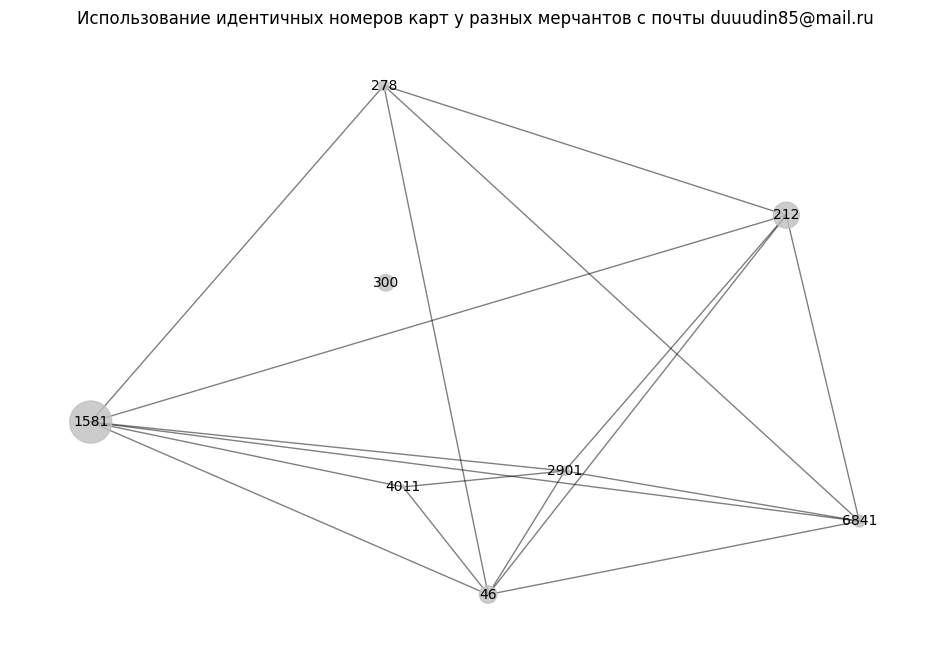

In [ ]:
duuud_data = data[data['Customer Email'] == 'duuudin85@mail.ru']
merchant_counts = duuud_data.groupby('Merchant ID').size()

G = nx.Graph()
for merchant, count in merchant_counts.items():
    G.add_node(merchant, size=count)

merchant_groups = duuud_data.groupby('Account Number')['Merchant ID'].unique()

# Добавляем ребра между Merchant ID, если они связаны номером карты
for merchants in merchant_groups:
    for i, merchant1 in enumerate(merchants):
        for merchant2 in merchants[i + 1:]:
            if G.has_edge(merchant1, merchant2):
                G[merchant1][merchant2]['weight'] += 1
            else:
                G.add_edge(merchant1, merchant2, weight=1)

node_sizes = [G.nodes[node]['size'] * 2 for node in G.nodes]

# Визуализация графа
plt.figure(figsize=(12, 8))
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='Silver', alpha=0.8)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

plt.title("Использование идентичных номеров карт у разных мерчантов с почты duuudin85@mail.ru")
plt.axis('off')
plt.show()


Видим, что у данного пользователя есть транзакции у 8 из 9 наших мерчантов, при этом только у одного использовались уникальные карты, в остальных был перебор. У мерчанта 1581 у пользователя успешные платежи, возможно, этим можно объяснить то, что у данного мерчанта в принципе самое большое количество транзакций

Проверим, есть ли еще пользователи, использующие данный фродовый сценарий. Для этого сгруппируем данные по электронным почтам, а затем отберем почты у которых есть транзакции более, чем с двух карт (в среднем, в моем обывательском представлении, один человек может использовать 3 карты для попытки оплаты при отклонении транзакций).

При этом тпежн аважно, что большая часть операций отмененв (так ка происходит перебор номеров карт и попытки списания), поэтому установим количество отмененных пераций больше, чем 2/3 от общего количества операций.

Еще одно условие - есть транзакции с отличающимися странами по ip и по карте


In [ ]:
suspicious_emails = []
for email in data['Customer Email'].unique().tolist():
  email_data = data[(data['Customer Email'] == email)]
  email_data_shape = email_data.shape[0]
  data_decline = (email_data[email_data['Operation Status'] == 'decline']).shape[0]
  data_accaunts = email_data['Account Number'].nunique()
  c_dif = email_data[email_data['Country By IP Name'] != email_data['Issuer Country Name']].shape[0]
  if (data_accaunts > 3) and (data_decline > (email_data_shape*(2/3))) and (c_dif >= 1):
    suspicious_emails.append(email)
    print(email)

duuudin85@mail.ru
sukronr370@gmail.com
spectramike65@gmail.com
Joy90@gmail.com


Остальные почты являются подозрительными на фрод, так ка их небольшое количество далее можно проверить в ручном режиме и принять решение по каждой в отдельности.

Для более точного определения потенциальных фродстеров, можно также отфильтровать по таким критериям:
- Разные страна по ip и страна выпуска карты
- Транзакции с разных ip-адресов
- Использование разных имен владельцев карт и т.д.

Но также не стоит применять все эти условия одновременно, так как это слишком сузит поиск.

Если же объем подозрительных аккаунтов будет слишком большим, то проверить вручную будет невозможно, но при этом блокировать всех, кто подходит под условия, также нерационально, так как необоснованные блокировки могут ухудшать пользовательский опыт. В данной ситуации лучшим выходом будет использование алгоритмов машинного обучения для определения вероятности того, что тот или иной пользователь является фродстером.


In [ ]:
fr_money = data[(data['Customer Email'].isin(suspicious_emails)) & (data['Operation Status'] == 'success')] \
    .groupby('Customer Email', as_index=False) \
    .agg({'Channel Amount': 'sum', 'Channel Currency': lambda x: x.head(1)})

fr_money

,Customer Email,Channel Amount,Channel Currency
0,duuudin85@mail.ru,162.37,EUR
1,spectramike65@gmail.com,13500.00,NGN
2,sukronr370@gmail.com,363.17,EUR


Курс NGN к EUR за 2022 год в среднем 0,002245 (валюты во всех транзакциях одинаковые, поэтому взяла только первую)

In [ ]:
fr_money.loc[fr_money['Channel Currency'] == 'NGN', 'Channel Amount'] = fr_money['Channel Amount'] * 0.002245
fr_money.loc[fr_money['Channel Currency'] == 'NGN', 'Channel Currency'] = 'EUR'
fr_money = fr_money.sort_values('Channel Amount', ascending=False)
fr_money

,Customer Email,Channel Amount,Channel Currency
2,sukronr370@gmail.com,363.17,EUR
0,duuudin85@mail.ru,162.37,EUR
1,spectramike65@gmail.com,30.31,EUR


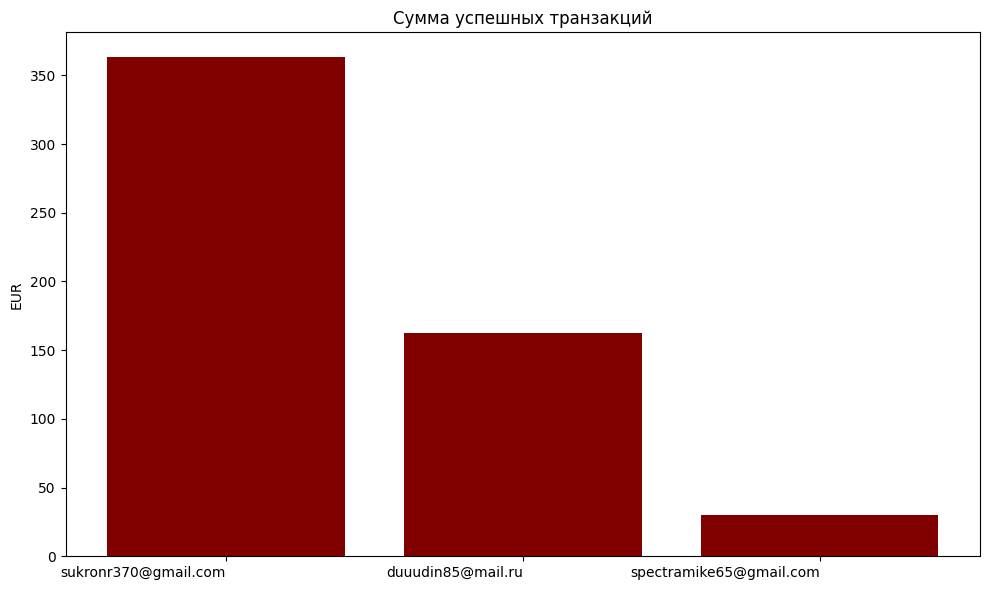

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(fr_money['Customer Email'], fr_money['Channel Amount'], color='Maroon')

plt.ylabel('EUR')
plt.title('Сумма успешных транзакций')

plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

Для дальнейшего анализа очистим наши данные от фродовых транзакций, чтобы они не искажали данные

In [ ]:
data = data[-data['Customer Email'].isin(suspicious_emails)]

# Обман системы?

Вернемся к нашему подозрительному мерчанту 1581, посмотрим на каком проекте и у каких пользователей наибольшее количество транзакций

In [ ]:
data_1581 = data[data['Merchant ID'] == 1581]
data_1581.groupby(['Project ID'], as_index=False)['Operation ID'].count()

,Project ID,Operation ID
0,5741,61
1,5761,9
2,5771,2267


In [ ]:
data_1581[data_1581['Project ID'] == 5771].groupby(['Customer ID'], as_index=False)['Operation ID'].count().sort_values('Operation ID', ascending=False).head(10)

,Customer ID,Operation ID
43,134623,181
113,27112,169
157,95022,126
119,32608,108
58,137952,79
130,54996,77
20,124221,66
23,125729,61
138,74457,61
125,42190,56


Посмотрим внимательнее на транзакции первого пользователя

In [ ]:
data[(data['Merchant ID'] == 1581) & (data['Customer ID'] == '134623')].head(10)

,Provider ID,Operation ID,Payment ID,Operation Type,Operation Status,Secure 3ds Check,Channel Amount,Channel Currency,Operation created at Date,Payment Method Type,Account Number,Merchant ID,Project ID,Customer ID,Customer Email,Card Holder,Issuer Country Name,Country By IP Name,Customer IP V4 V6,Issuer Bank Name
614,1293.00,86398010095991,347649101,sale,decline,NaN,21.93,EUR,2022-02-27,visa,472409******6170,1581,5771,134623,cyrilredesigns@outlook.com,CYRIL CIBULIS,Canada,Canada,157.52.6.254,The Toronto-Dominion Bank
615,1293.00,86398010095981,347649101,sale,decline,NaN,21.93,EUR,2022-02-27,visa,472409******6170,1581,5771,134623,cyrilredesigns@outlook.com,CYRIL CIBULIS,Canada,Canada,157.52.6.254,The Toronto-Dominion Bank
616,1293.00,86398010095971,347649101,sale,decline,NaN,21.93,EUR,2022-02-27,visa,472409******6170,1581,5771,134623,cyrilredesigns@outlook.com,CYRIL CIBULIS,Canada,Canada,157.52.6.254,The Toronto-Dominion Bank
617,1293.00,86398010095961,347649101,sale,decline,NaN,21.93,EUR,2022-02-27,visa,472409******6170,1581,5771,134623,cyrilredesigns@outlook.com,CYRIL CIBULIS,Canada,Canada,157.52.6.254,The Toronto-Dominion Bank
618,1293.00,86398010095951,347649101,sale,decline,NaN,21.93,EUR,2022-02-27,visa,472409******6170,1581,5771,134623,cyrilredesigns@outlook.com,CYRIL CIBULIS,Canada,Canada,157.52.6.254,The Toronto-Dominion Bank
619,1293.00,86398010095941,347649101,sale,decline,NaN,21.93,EUR,2022-02-27,visa,472409******6170,1581,5771,134623,cyrilredesigns@outlook.com,CYRIL CIBULIS,Canada,Canada,157.52.6.254,The Toronto-Dominion Bank
1040,1293.00,79865010096321,347695695,sale,success,NaN,21.93,EUR,2022-02-27,visa,472409******6170,1581,5771,134623,cyrilredesigns@outlook.com,CYRIL CIBULIS,Canada,Canada,157.52.6.254,The Toronto-Dominion Bank
1041,1293.00,79865010096311,347695695,sale,decline,NaN,21.93,EUR,2022-02-27,visa,472409******6170,1581,5771,134623,cyrilredesigns@outlook.com,CYRIL CIBULIS,Canada,Canada,157.52.6.254,The Toronto-Dominion Bank
1042,1293.00,79865010096301,347695695,sale,decline,NaN,21.93,EUR,2022-02-27,visa,472409******6170,1581,5771,134623,cyrilredesigns@outlook.com,CYRIL CIBULIS,Canada,Canada,157.52.6.254,The Toronto-Dominion Bank
1043,1293.00,79865010096291,347695695,sale,decline,NaN,21.93,EUR,2022-02-27,visa,472409******6170,1581,5771,134623,cyrilredesigns@outlook.com,CYRIL CIBULIS,Canada,Canada,157.52.6.254,The Toronto-Dominion Bank


In [ ]:
data[(data['Merchant ID'] == 1581) & (data['Customer ID'] == '134623')]['Operation Status'].value_counts()

,count
Operation Status,
decline,170
success,11


In [ ]:
data[(data['Merchant ID'] == 1581) & (data['Customer ID'] == '134623') & (data['Operation Status'] == 'success')]

,Provider ID,Operation ID,Payment ID,Operation Type,Operation Status,Secure 3ds Check,Channel Amount,Channel Currency,Operation created at Date,Payment Method Type,Account Number,Merchant ID,Project ID,Customer ID,Customer Email,Card Holder,Issuer Country Name,Country By IP Name,Customer IP V4 V6,Issuer Bank Name
1040,1293.00,79865010096321,347695695,sale,success,NaN,21.93,EUR,2022-02-27,visa,472409******6170,1581,5771,134623,cyrilredesigns@outlook.com,CYRIL CIBULIS,Canada,Canada,157.52.6.254,The Toronto-Dominion Bank
3647,1293.00,5056093010096962,347818573,sale,success,NaN,21.93,EUR,2022-02-27,visa,472409******6170,1581,5771,134623,cyrilredesigns@outlook.com,CYRIL CIBULIS,Canada,Canada,157.52.6.254,The Toronto-Dominion Bank
4659,1293.00,5041821010096282,347677249,sale,success,NaN,21.93,EUR,2022-02-27,visa,472409******6170,1581,5771,134623,cyrilredesigns@outlook.com,CYRIL CIBULIS,Canada,Canada,157.52.6.254,The Toronto-Dominion Bank
5027,1293.00,5036108010095842,347734912,sale,success,NaN,21.93,EUR,2022-02-27,visa,472409******6170,1581,5771,134623,cyrilredesigns@outlook.com,CYRIL CIBULIS,Canada,Canada,157.52.6.254,The Toronto-Dominion Bank
5576,1293.00,5028393010094012,347754303,sale,success,NaN,21.93,EUR,2022-02-27,visa,472409******6170,1581,5771,134623,cyrilredesigns@outlook.com,CYRIL CIBULIS,Canada,Canada,157.52.6.254,The Toronto-Dominion Bank
5959,1293.00,5023913010095562,347631153,sale,success,NaN,21.93,EUR,2022-02-27,visa,472409******6170,1581,5771,134623,cyrilredesigns@outlook.com,CYRIL CIBULIS,Canada,Canada,157.52.6.254,The Toronto-Dominion Bank
6784,1293.00,5012462010095202,347684829,sale,success,NaN,21.93,EUR,2022-02-27,visa,472409******6170,1581,5771,134623,cyrilredesigns@outlook.com,CYRIL CIBULIS,Canada,Canada,157.52.6.254,The Toronto-Dominion Bank
7136,1293.00,5007448010095232,347652334,sale,success,NaN,21.93,EUR,2022-02-27,visa,472409******6170,1581,5771,134623,cyrilredesigns@outlook.com,CYRIL CIBULIS,Canada,Canada,157.52.6.254,The Toronto-Dominion Bank
7175,1293.00,5006726010094782,347636806,sale,success,NaN,21.93,EUR,2022-02-27,visa,472409******6170,1581,5771,134623,cyrilredesigns@outlook.com,CYRIL CIBULIS,Canada,Canada,157.52.6.254,The Toronto-Dominion Bank
9344,1293.00,30488010047071,347954364,sale,success,NaN,22.11,EUR,2022-02-27,visa,472409******6170,1581,5771,134623,cyrilredesigns@outlook.com,CYRIL CIBULIS,Canada,Canada,157.52.6.254,The Toronto-Dominion Bank


In [ ]:
data[(data['Merchant ID'] == 1581) & (data['Customer ID'] == '134623')]['Provider ID'].value_counts()

,count
Provider ID,
1293.00,181


In [ ]:
data[(data['Merchant ID'] == 1581) & (data['Customer ID'] == '134623')]['Operation created at Date'].value_counts()

,count
Operation created at Date,
2022-02-27,165
2022-02-28,16


In [ ]:
data[(data['Merchant ID'] == 1581) & (data['Customer ID'] == '134623') & (data['Operation created at Date'] == '2022-02-28')]

,Provider ID,Operation ID,Payment ID,Operation Type,Operation Status,Secure 3ds Check,Channel Amount,Channel Currency,Operation created at Date,Payment Method Type,Account Number,Merchant ID,Project ID,Customer ID,Customer Email,Card Holder,Issuer Country Name,Country By IP Name,Customer IP V4 V6,Issuer Bank Name
1379,1293.00,75370010095901,348043323,sale,decline,NaN,22.03,EUR,2022-02-28,visa,472409******6170,1581,5771,134623,cyrilredesigns@outlook.com,CYRIL CIBULIS,Canada,Canada,157.52.6.254,The Toronto-Dominion Bank
1380,1293.00,75370010095891,348043323,sale,decline,NaN,22.03,EUR,2022-02-28,visa,472409******6170,1581,5771,134623,cyrilredesigns@outlook.com,CYRIL CIBULIS,Canada,Canada,157.52.6.254,The Toronto-Dominion Bank
1381,1293.00,75370010095881,348043323,sale,decline,NaN,22.03,EUR,2022-02-28,visa,472409******6170,1581,5771,134623,cyrilredesigns@outlook.com,CYRIL CIBULIS,Canada,Canada,157.52.6.254,The Toronto-Dominion Bank
1382,1293.00,75370010095871,348043323,sale,decline,NaN,22.03,EUR,2022-02-28,visa,472409******6170,1581,5771,134623,cyrilredesigns@outlook.com,CYRIL CIBULIS,Canada,Canada,157.52.6.254,The Toronto-Dominion Bank
1383,1293.00,75370010095861,348043323,sale,decline,NaN,22.03,EUR,2022-02-28,visa,472409******6170,1581,5771,134623,cyrilredesigns@outlook.com,CYRIL CIBULIS,Canada,Canada,157.52.6.254,The Toronto-Dominion Bank
9507,1293.00,28398010046091,348045745,sale,decline,NaN,22.03,EUR,2022-02-28,visa,472409******6170,1581,5771,134623,cyrilredesigns@outlook.com,CYRIL CIBULIS,Canada,Canada,157.52.6.254,The Toronto-Dominion Bank
9508,1293.00,28398010046081,348045745,sale,decline,NaN,22.03,EUR,2022-02-28,visa,472409******6170,1581,5771,134623,cyrilredesigns@outlook.com,CYRIL CIBULIS,Canada,Canada,157.52.6.254,The Toronto-Dominion Bank
9509,1293.00,28398010046071,348045745,sale,decline,NaN,22.03,EUR,2022-02-28,visa,472409******6170,1581,5771,134623,cyrilredesigns@outlook.com,CYRIL CIBULIS,Canada,Canada,157.52.6.254,The Toronto-Dominion Bank
9510,1293.00,28398010046061,348045745,sale,decline,NaN,22.03,EUR,2022-02-28,visa,472409******6170,1581,5771,134623,cyrilredesigns@outlook.com,CYRIL CIBULIS,Canada,Canada,157.52.6.254,The Toronto-Dominion Bank
9511,1293.00,28398010046051,348045745,sale,decline,NaN,22.03,EUR,2022-02-28,visa,472409******6170,1581,5771,134623,cyrilredesigns@outlook.com,CYRIL CIBULIS,Canada,Canada,157.52.6.254,The Toronto-Dominion Bank


In [ ]:
data[(data['Merchant ID'] == 1581) & (data['Customer ID'] == '134623')]['Account Number'].value_counts()

,count
Account Number,
472409******6170,181


In [ ]:
data[(data['Merchant ID'] == 1581) & (data['Customer ID'] == '134623')]['Channel Amount'].value_counts()

,count
Channel Amount,
21.93,108
22.08,56
22.03,16
22.11,1


Посмотрим также на второго пользователя, чтобы найти закономерности

In [ ]:
data[(data['Merchant ID'] == 1581) & (data['Customer ID'] == '27112')].head(10)

,Provider ID,Operation ID,Payment ID,Operation Type,Operation Status,Secure 3ds Check,Channel Amount,Channel Currency,Operation created at Date,Payment Method Type,Account Number,Merchant ID,Project ID,Customer ID,Customer Email,Card Holder,Issuer Country Name,Country By IP Name,Customer IP V4 V6,Issuer Bank Name
3968,1293.00,5052251010096452,347914995,sale,decline,NaN,31.15,EUR,2022-02-27,visa,459654******5260,1581,5771,27112,odin.schultze@gmail.com,DAN ODIN SCHULTZE,Norway,Norway,89.10.102.53,REVOLUT LIMITED
3969,1293.00,5052251010096442,347914995,sale,decline,NaN,31.15,EUR,2022-02-27,visa,459654******5260,1581,5771,27112,odin.schultze@gmail.com,DAN ODIN SCHULTZE,Norway,Norway,89.10.102.53,REVOLUT LIMITED
3970,1293.00,5052251010096432,347914995,sale,decline,NaN,31.15,EUR,2022-02-27,visa,459654******5260,1581,5771,27112,odin.schultze@gmail.com,DAN ODIN SCHULTZE,Norway,Norway,89.10.102.53,REVOLUT LIMITED
3971,1293.00,5052251010096422,347914995,sale,decline,NaN,31.15,EUR,2022-02-27,visa,459654******5260,1581,5771,27112,odin.schultze@gmail.com,DAN ODIN SCHULTZE,Norway,Norway,89.10.102.53,REVOLUT LIMITED
3972,1293.00,5052251010096412,347914995,sale,decline,NaN,31.15,EUR,2022-02-27,visa,459654******5260,1581,5771,27112,odin.schultze@gmail.com,DAN ODIN SCHULTZE,Norway,Norway,89.10.102.53,REVOLUT LIMITED
3973,1293.00,5052251010096402,347914995,sale,decline,NaN,31.15,EUR,2022-02-27,visa,459654******5260,1581,5771,27112,odin.schultze@gmail.com,DAN ODIN SCHULTZE,Norway,Norway,89.10.102.53,REVOLUT LIMITED
3974,1293.00,5052251010096392,347914995,sale,decline,NaN,31.15,EUR,2022-02-27,visa,459654******5260,1581,5771,27112,odin.schultze@gmail.com,DAN ODIN SCHULTZE,Norway,Norway,89.10.102.53,REVOLUT LIMITED
3975,1293.00,5052251010096382,347914995,sale,decline,NaN,31.15,EUR,2022-02-27,visa,459654******5260,1581,5771,27112,odin.schultze@gmail.com,DAN ODIN SCHULTZE,Norway,Norway,89.10.102.53,REVOLUT LIMITED
3976,1293.00,5052251010096372,347914995,sale,decline,NaN,31.15,EUR,2022-02-27,visa,459654******5260,1581,5771,27112,odin.schultze@gmail.com,DAN ODIN SCHULTZE,Norway,Norway,89.10.102.53,REVOLUT LIMITED
3977,1293.00,5052251010096362,347914995,sale,decline,NaN,31.15,EUR,2022-02-27,visa,459654******5260,1581,5771,27112,odin.schultze@gmail.com,DAN ODIN SCHULTZE,Norway,Norway,89.10.102.53,REVOLUT LIMITED


In [ ]:
data[(data['Merchant ID'] == 1581) & (data['Customer ID'] == '27112')]['Operation Status'].value_counts()

,count
Operation Status,
decline,168
success,1


In [ ]:
data[(data['Merchant ID'] == 1581) & (data['Customer ID'] == '27112')]['Operation created at Date'].value_counts()

,count
Operation created at Date,
2022-02-27,169


In [ ]:
data[(data['Merchant ID'] == 1581) & (data['Customer ID'] == '27112')]['Account Number'].value_counts()

,count
Account Number,
459654******5260,169


In [ ]:
data[(data['Merchant ID'] == 1581) & (data['Customer ID'] == '27112')]['Provider ID'].value_counts()

,count
Provider ID,
1293.00,169


In [ ]:
data[(data['Merchant ID'] == 1581) & (data['Customer ID'] == '27112')]['Channel Amount'].value_counts()

,count
Channel Amount,
51.24,28
60.29,28
59.78,28
59.28,22
31.15,14
61.29,14
58.78,14
60.79,14
50.74,7


Попробуем идентифицировать фродстеров так
- больше 70% транзакций отклонены
- все платежи с одной карты
- все платежи через провайдера 1293
- минимум 3 платежа

In [ ]:
fraud_list = list()
for customer_id, customer_data in data_1581.groupby('Customer ID'):
    decline_count = customer_data[customer_data['Operation Status'] == 'decline'].shape[0]
    all_count = customer_data.shape[0]
    percent_decline = decline_count / all_count
    cards = customer_data['Account Number'].nunique()

    if (percent_decline > 0.7) and (all_count > 3) and (cards == 1) and (all(customer_data['Provider ID'] == 1293)):
        fraud_list.append(customer_id)


In [ ]:
data_1581_fraud = data_1581[data_1581['Customer ID'].isin(fraud_list)]

In [ ]:
data_1581_check = data_1581[-data_1581['Customer ID'].isin(fraud_list)]

In [ ]:
data_1581_check['Provider ID'].value_counts()

,count
Provider ID,
1293.00,302
1941.00,239
1431.00,85
1299.00,1


In [ ]:
data_1581_check[data_1581_check['Provider ID'] == 1293.00]['Operation Status'].value_counts()

,count
Operation Status,
decline,266
success,27
awaiting redirect result,9


In [ ]:
data_1581_check['Customer ID'].value_counts().head()

,count
Customer ID,
32608,108
124221,66
137947,31
126679,23
138127,19


In [ ]:
data_1581_check[data_1581_check['Customer ID'] == '32608'].head()

,Provider ID,Operation ID,Payment ID,Operation Type,Operation Status,Secure 3ds Check,Channel Amount,Channel Currency,Operation created at Date,Payment Method Type,Account Number,Merchant ID,Project ID,Customer ID,Customer Email,Card Holder,Issuer Country Name,Country By IP Name,Customer IP V4 V6,Issuer Bank Name
45,1293.00,99381010096081,347062526,sale,success,NaN,21.09,EUR,2022-02-26,visa,410651******9726,1581,5771,32608,kiesha17@gmail.com,KESTUTIS JANULEVICIUS,Norway,Norway,77.110.194.89,Sparebank 1 Kreditt AS
301,1293.00,92331010095011,347148364,sale,success,NaN,51.24,EUR,2022-02-26,visa,430372******5331,1581,5771,32608,kiesha17@gmail.com,KESTUTIS JANULEVICIUS,Norway,Norway,77.110.194.89,Santander Consumer Bank As
302,1293.00,92331010094991,347148364,sale,decline,NaN,51.24,EUR,2022-02-26,visa,430372******5331,1581,5771,32608,kiesha17@gmail.com,KESTUTIS JANULEVICIUS,Norway,Norway,77.110.194.89,Santander Consumer Bank As
324,1293.00,92051010096351,347169208,sale,success,NaN,51.24,EUR,2022-02-26,visa,430372******5331,1581,5771,32608,kiesha17@gmail.com,KESTUTIS JANULEVICIUS,Norway,Norway,77.110.194.89,Santander Consumer Bank As
325,1293.00,92051010096341,347169208,sale,decline,NaN,51.24,EUR,2022-02-26,visa,430372******5331,1581,5771,32608,kiesha17@gmail.com,KESTUTIS JANULEVICIUS,Norway,Norway,77.110.194.89,Santander Consumer Bank As


Видим, что условие про платежи с одной карты не является истинным

In [ ]:
data[((data['Merchant ID'] == 1581) & (data['Provider ID'] == 1293) & (data['Operation Status'] == 'success'))]['Channel Currency'].value_counts()

,count
Channel Currency,
EUR,136
USD,2


Евро к доллару на 26 февраля 2022 - 1,12

In [ ]:
data.loc[((data['Merchant ID'] == 1581) & (data['Provider ID'] == 1293) & (data['Operation Status'] == 'success') & (data['Channel Currency'] == 'USD')), 'Channel Amount'] = data['Channel Amount'] * 1.12
data[((data['Merchant ID'] == 1581) & (data['Provider ID'] == 1293) & (data['Operation Status'] == 'success'))]['Channel Amount'].sum()

8353.375600000001

In [ ]:
data_1581_fraud['Country By IP Name'].value_counts()

,count
Country By IP Name,
Norway,413
Spain,189
Canada,181
Denmark,176
Poland,159
Ireland,92
Germany,91
Israel,79
Sweden,74


In [ ]:
def get_location_from_ip(ip):
    url = f"http://ip-api.com/json/{ip}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        return {
            "ip": ip,
            "country": data.get("country"),
            "region": data.get("regionName"),
            "city": data.get("city"),
            "latitude": data.get("lat"),
            "longitude": data.get("lon"),
        }
    else:
        return None

filtered_ips = data_1581_fraud['Customer IP V4 V6'].unique().tolist()
locations = []
for ip in filtered_ips:
    location = get_location_from_ip(ip)
    if location and location["latitude"] and location["longitude"]:
        locations.append(location)
m = folium.Map(location=[50, 70], zoom_start=4)

for loc in locations:
    folium.Marker(
        location=[loc["latitude"], loc["longitude"]],
        popup=f"IP: {loc['ip']}<br>City: {loc['city']}<br>Region: {loc['region']}<br>Country: {loc['country']}",
        tooltip=loc["ip"],
        icon=folium.Icon(color='Maroon')
    ).add_to(m)
m


In [ ]:
data[data['Provider ID'] == 1293]['Operation Status'].value_counts()

,count
Operation Status,
decline,4471
success,1641
external error,21
awaiting redirect result,16


In [ ]:
data[(data['Provider ID'] == 1293)].groupby(['Merchant ID', 'Operation Status'], as_index=False)['Operation ID'].count()

,Merchant ID,Operation Status,Operation ID
0,39,decline,5
1,39,success,1
2,46,awaiting redirect result,7
3,46,decline,940
4,46,external error,21
5,46,success,522
6,212,decline,1523
7,212,success,961
8,278,decline,132
9,278,success,19


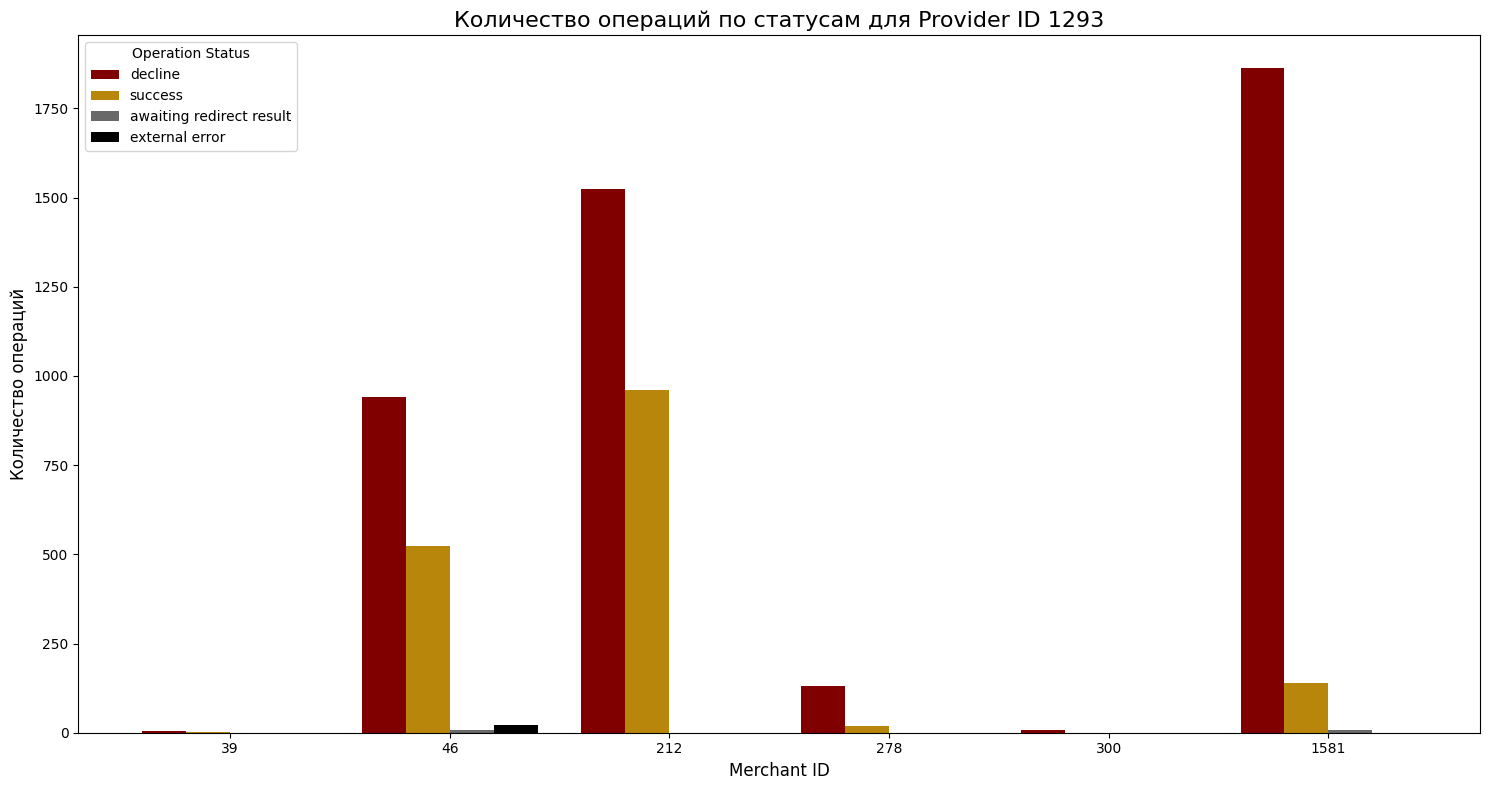

In [ ]:
grouped_data = data[(data['Provider ID'] == 1293)].groupby(['Merchant ID', 'Operation Status'], as_index=False)['Operation ID'].count()

merchant_ids = grouped_data['Merchant ID'].unique()
operation_statuses = grouped_data['Operation Status'].unique()

final_data = []

for merchant_id in merchant_ids:
    row = {'Merchant ID': merchant_id}
    for status in operation_statuses:
        operation_count = grouped_data[(grouped_data['Merchant ID'] == merchant_id) &
                                       (grouped_data['Operation Status'] == status)]['Operation ID']
        row[status] = operation_count.iloc[0] if not operation_count.empty else 0
    final_data.append(row)

final_df = pd.DataFrame(final_data)
fig, ax = plt.subplots(figsize=(15, 8))
bar_width = 0.2
index = np.arange(len(merchant_ids))

colors = ['maroon', 'DarkGoldenRod', 'DimGray', 'black']

for i, (status, color) in enumerate(zip(operation_statuses, colors)):
    ax.bar(index + i * bar_width, final_df[status], width=bar_width, label=status, color=color)

ax.set_xticks(index + bar_width * (len(operation_statuses) - 1) / 2)
ax.set_xticklabels(merchant_ids)

ax.set_title('Количество операций по статусам для Provider ID 1293', fontsize=16)
ax.set_xlabel('Merchant ID', fontsize=12)
ax.set_ylabel('Количество операций', fontsize=12)
ax.legend(title='Operation Status')

plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

Платежи через данного провайдера и мерчанта являются подозрительными, но нельзя точно утверждать, что это фрод - возможно сбой на стороне провайдера. Но даже если они являются багом, лучше очистить датафрейм для дальнейшего анализа

In [ ]:
data = data[-((data['Merchant ID'] == 1581) & (data['Provider ID'] == 1293))]

# Джон Доу

Во время долгого исследования данных (за кадром) был обнаружен пользователь с подозрительным имененм. Исследуем, связанные с ним транзакции

In [ ]:
data.columns

Index(['Provider ID', 'Operation ID', 'Payment ID', 'Operation Type',
       'Operation Status', 'Secure 3ds Check', 'Channel Amount',
       'Channel Currency', 'Operation created at Date', 'Payment Method Type',
       'Account Number', 'Merchant ID', 'Project ID', 'Customer ID',
       'Customer Email', 'Card Holder', 'Issuer Country Name',
       'Country By IP Name', 'Customer IP V4 V6', 'Issuer Bank Name'],
      dtype='object')

In [ ]:
data[data['Card Holder'] == 'JOHN DOE']['Provider ID'].value_counts()

,count
Provider ID,
1293.00,277


In [ ]:
data[data['Card Holder'] == 'JOHN DOE']['Operation Type'].value_counts()

,count
Operation Type,
sale,277


In [ ]:
data[data['Card Holder'] == 'JOHN DOE']['Operation Status'].value_counts()

,count
Operation Status,
success,166
decline,111


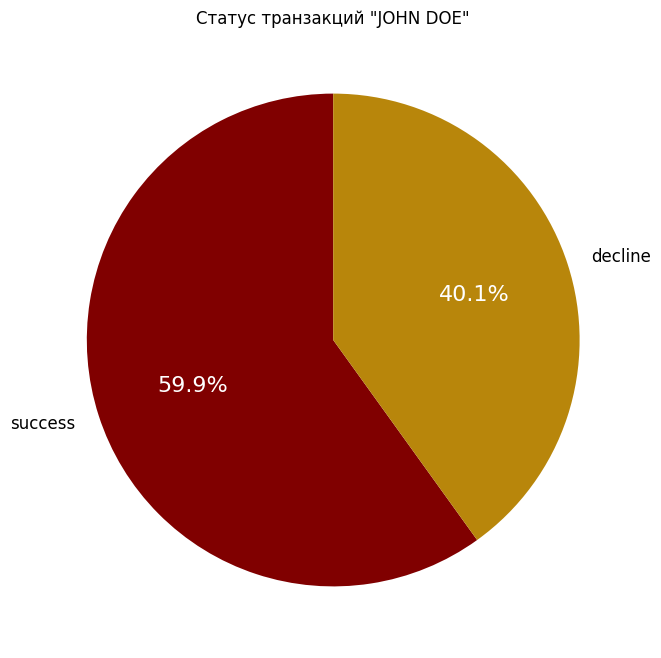

In [ ]:
operation_status_counts = data[data['Card Holder'] == 'JOHN DOE']['Operation Status'].value_counts()

custom_colors = ['Maroon', 'DarkGoldenRod']

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    operation_status_counts,
    labels=operation_status_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_colors
)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(16)

for text in texts:
    text.set_fontsize(12)
    text.set_color('black')

plt.title('Статус транзакций "JOHN DOE"')
plt.show()

Евро к доллару - 1,133 на 26 декабря 2021 года

In [ ]:
data[(data['Card Holder'] == 'JOHN DOE') & (data['Operation Status'] == 'success')]['Channel Currency'].value_counts()

,count
Channel Currency,
EUR,164
USD,2


In [ ]:
data[(data['Card Holder'] == 'JOHN DOE') & (data['Operation Status'] == 'success')]['Channel Amount'].sum()

4515.34

In [ ]:
data[(data['Card Holder'] == 'JOHN DOE') & (data['Operation Status'] == 'success') & (data['Channel Currency'] == 'USD')]['Channel Amount']

,Channel Amount
11364,3.96
12349,5.29


In [ ]:
data.loc[(data['Card Holder'] == 'JOHN DOE') & (data['Operation Status'] == 'success') & (data['Channel Currency'] == 'USD'), 'Channel Amount'] = data['Channel Amount']*1.133

In [ ]:
data[(data['Card Holder'] == 'JOHN DOE') & (data['Operation Status'] == 'success')]['Channel Amount'].sum()

4516.57025

In [ ]:
data[data['Card Holder'] == 'JOHN DOE']['Operation created at Date'].value_counts()

,count
Operation created at Date,
2021-12-29,277


In [ ]:
data[data['Card Holder'] == 'JOHN DOE']['Payment Method Type'].value_counts()

,count
Payment Method Type,
visa,248
mastercard,29


In [ ]:
data[data['Card Holder'] == 'JOHN DOE']['Account Number'].value_counts().head(10)

,count
Account Number,
416973******6115,9
416974******9981,9
462239******4068,9
533317******0689,7
533317******1830,7
409809******6484,5
499001******0676,5
497874******2338,5
416973******0072,5


In [ ]:
data[data['Card Holder'] == 'JOHN DOE']['Merchant ID'].value_counts()

,count
Merchant ID,
212,277


In [ ]:
data[data['Card Holder'] == 'JOHN DOE']['Project ID'].value_counts()

,count
Project ID,
27361,231
27331,25
43041,9
5591,5
7551,4
28481,3


In [ ]:
data[data['Card Holder'] == 'JOHN DOE']['Customer ID'].value_counts().head(10)

,count
Customer ID,
21af7e457c4a882da5fc577226445ac9c6dca700f0e9780c3545d2e7bdaede2b,9
ab31ecf4dea762d7aabcb73628541ced545ba33cd1e6ef9696ca9dd3e6f68d54,9
e5901c6918d3d552152efa117093e3802d1989943f11ed7e3fe0126782df220d,7
a5a64e1ab99bb492ae8e79a906bdb948836fb01cb290e261849dbd870dd408e8,7
1c98f64c6623a2908452acb87f8a33ade122ff5b9aeedb5dd9a037d4baa6501c,7
fbab45b3e0b9e038f2e6cf856885c944e675891cfc91c23db8313c486ff724d1,5
c94bbbccb17e1da80d27e9d2897146a8d3b0927d4dee4fbee25a9c38f8fe1344,5
2b725f32bac374c79f9229be63fb7bdfd76efa00742af8b9dc4440d5dd98ddaa,5
ebc5b84dd2b4300dc4ee3b7f08fc82aece616d98ab6de4adcaf680b183bac5fb,5


In [ ]:
data[data['Card Holder'] == 'JOHN DOE']['Customer Email'].value_counts()

,count
Customer Email,
payway.system@gmail.com,272
anonymous@tranzzo.com,5


In [ ]:
data[data['Card Holder'] == 'JOHN DOE']['Issuer Country Name'].value_counts()

,count
Issuer Country Name,
Azerbaijan,186
France,39
Italy,30
Australia,9
Poland,4
Russian Federation,3
Qatar,2
New Zealand,2
Congo,1


In [ ]:
data[data['Card Holder'] == 'JOHN DOE']['Country By IP Name'].value_counts()

,count
Country By IP Name,
Azerbaijan,186
France,39
Italy,30
United States,9
Poland,4
Qatar,2
New Zealand,2
Turkey,2
Nigeria,1


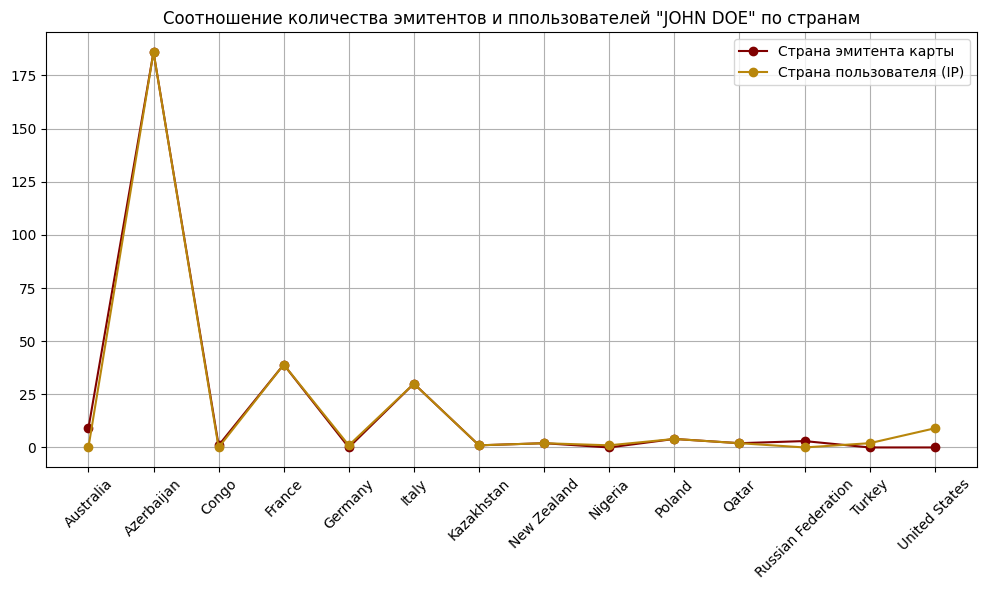

In [ ]:
issuer_country_counts = data[data['Card Holder'] == 'JOHN DOE']['Issuer Country Name'].value_counts()
ip_country_counts = data[data['Card Holder'] == 'JOHN DOE']['Country By IP Name'].value_counts()

countries = sorted(set(issuer_country_counts.index).union(set(ip_country_counts.index)))

issuer_values = [issuer_country_counts.get(country, 0) for country in countries]
ip_values = [ip_country_counts.get(country, 0) for country in countries]

plt.figure(figsize=(10, 6))
plt.plot(countries, issuer_values, label='Страна эмитента карты', marker='o', color='Maroon')
plt.plot(countries, ip_values, label='Страна пользователя (IP)', marker='o', color='DarkGoldenRod')

plt.title('Соотношение количества эмитентов и ппользователей "JOHN DOE" по странам')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
data[(data['Card Holder'] == 'JOHN DOE') & (data["Issuer Country Name"] != data["Country By IP Name"])].shape

(17, 20)

In [ ]:
data[(data['Card Holder'] == 'JOHN DOE') & (data["Issuer Country Name"] == data["Country By IP Name"])].shape

(260, 20)

In [ ]:
data[(data['Card Holder'] == 'JOHN DOE') & (data["Customer ID"] == '21af7e457c4a882da5fc577226445ac9c6dca700f0e9780c3545d2e7bdaede2b')]

,Provider ID,Operation ID,Payment ID,Operation Type,Operation Status,Secure 3ds Check,Channel Amount,Channel Currency,Operation created at Date,Payment Method Type,Account Number,Merchant ID,Project ID,Customer ID,Customer Email,Card Holder,Issuer Country Name,Country By IP Name,Customer IP V4 V6,Issuer Bank Name
11160,1293.00,5049838010089722,7d61abc1-293c-432e-b48f-cdb00ff6865d,sale,decline,NaN,31.98,EUR,2021-12-29,visa,462239******4068,212,43041,21af7e457c4a882da5fc577226445ac9c6dca700f0e978...,payway.system@gmail.com,JOHN DOE,Australia,United States,104.25.0.19,Australia and New Zealand Banking Group Limited
11611,1293.00,5045148010089302,252c2ff8-c19d-486c-92a5-75e8209376a4,sale,decline,NaN,15.99,EUR,2021-12-29,visa,462239******4068,212,43041,21af7e457c4a882da5fc577226445ac9c6dca700f0e978...,payway.system@gmail.com,JOHN DOE,Australia,United States,104.25.0.19,Australia and New Zealand Banking Group Limited
11987,1293.00,45277010053611,37e19c6d-c93e-42c1-a6c8-757a9e6798b9,sale,decline,NaN,31.98,EUR,2021-12-29,visa,462239******4068,212,43041,21af7e457c4a882da5fc577226445ac9c6dca700f0e978...,payway.system@gmail.com,JOHN DOE,Australia,United States,104.25.0.19,Australia and New Zealand Banking Group Limited
12119,1293.00,39712010040311,336462f5-833e-4e14-a73e-fd593657cccf,sale,decline,NaN,19.19,EUR,2021-12-29,visa,462239******4068,212,43041,21af7e457c4a882da5fc577226445ac9c6dca700f0e978...,payway.system@gmail.com,JOHN DOE,Australia,United States,104.25.0.19,Australia and New Zealand Banking Group Limited
12194,1293.00,5016330010088072,d468fe6c-7a10-498f-8448-e7a5ad4d839d,sale,decline,NaN,44.78,EUR,2021-12-29,visa,462239******4068,212,43041,21af7e457c4a882da5fc577226445ac9c6dca700f0e978...,payway.system@gmail.com,JOHN DOE,Australia,United States,104.25.0.19,Australia and New Zealand Banking Group Limited
12464,1293.00,45277010053601,37e19c6d-c93e-42c1-a6c8-757a9e6798b9,sale,decline,NaN,31.98,EUR,2021-12-29,visa,462239******4068,212,43041,21af7e457c4a882da5fc577226445ac9c6dca700f0e978...,payway.system@gmail.com,JOHN DOE,Australia,United States,104.25.0.19,Australia and New Zealand Banking Group Limited
12628,1293.00,5046160010089542,c8cd70b5-a7cd-4789-9903-7457e5d16521,sale,decline,NaN,19.19,EUR,2021-12-29,visa,462239******4068,212,43041,21af7e457c4a882da5fc577226445ac9c6dca700f0e978...,payway.system@gmail.com,JOHN DOE,Australia,United States,104.25.0.19,Australia and New Zealand Banking Group Limited
12797,1293.00,59777010082871,f1b66dfa-453b-4d17-b41b-9ce63647aa76,sale,success,NaN,25.59,EUR,2021-12-29,visa,462239******4068,212,43041,21af7e457c4a882da5fc577226445ac9c6dca700f0e978...,payway.system@gmail.com,JOHN DOE,Australia,United States,104.25.0.19,Australia and New Zealand Banking Group Limited
13535,1293.00,5027004010088302,c4f00099-8be1-4a6b-b473-1a5d4150d9c8,sale,success,NaN,31.98,EUR,2021-12-29,visa,462239******4068,212,43041,21af7e457c4a882da5fc577226445ac9c6dca700f0e978...,payway.system@gmail.com,JOHN DOE,Australia,United States,104.25.0.19,Australia and New Zealand Banking Group Limited


In [ ]:
data[(data['Card Holder'] == 'JOHN DOE') & (data["Customer ID"] == 'ab31ecf4dea762d7aabcb73628541ced545ba33cd1e6ef9696ca9dd3e6f68d54')]

,Provider ID,Operation ID,Payment ID,Operation Type,Operation Status,Secure 3ds Check,Channel Amount,Channel Currency,Operation created at Date,Payment Method Type,Account Number,Merchant ID,Project ID,Customer ID,Customer Email,Card Holder,Issuer Country Name,Country By IP Name,Customer IP V4 V6,Issuer Bank Name
11143,1293.00,5021667010088182,b7e6839e-e325-431d-ae96-f16e81535651,sale,decline,NaN,2.57,EUR,2021-12-29,visa,416974******9981,212,27361,ab31ecf4dea762d7aabcb73628541ced545ba33cd1e6ef...,payway.system@gmail.com,JOHN DOE,Azerbaijan,Azerbaijan,5.191.18.178,Kapital Bank JSB
11148,1293.00,5021667010088202,b7e6839e-e325-431d-ae96-f16e81535651,sale,decline,NaN,2.57,EUR,2021-12-29,visa,416974******9981,212,27361,ab31ecf4dea762d7aabcb73628541ced545ba33cd1e6ef...,payway.system@gmail.com,JOHN DOE,Azerbaijan,Azerbaijan,5.191.18.178,Kapital Bank JSB
11278,1293.00,32186010041301,15e517cc-edbd-45d5-ab35-6ef8dd008cc8,sale,decline,NaN,2.57,EUR,2021-12-29,visa,416974******9981,212,27361,ab31ecf4dea762d7aabcb73628541ced545ba33cd1e6ef...,payway.system@gmail.com,JOHN DOE,Azerbaijan,Azerbaijan,5.191.51.187,Kapital Bank JSB
11512,1293.00,5021667010088192,b7e6839e-e325-431d-ae96-f16e81535651,sale,decline,NaN,2.57,EUR,2021-12-29,visa,416974******9981,212,27361,ab31ecf4dea762d7aabcb73628541ced545ba33cd1e6ef...,payway.system@gmail.com,JOHN DOE,Azerbaijan,Azerbaijan,5.191.18.178,Kapital Bank JSB
11828,1293.00,9364010039171,95742473-3a6c-4b3a-b34c-a5f71dfe216c,sale,decline,NaN,2.57,EUR,2021-12-29,visa,416974******9981,212,27361,ab31ecf4dea762d7aabcb73628541ced545ba33cd1e6ef...,payway.system@gmail.com,JOHN DOE,Azerbaijan,Azerbaijan,5.191.51.187,Kapital Bank JSB
11876,1293.00,36409010040351,fb84673a-b053-48a2-8784-86764f619b9e,sale,decline,NaN,2.57,EUR,2021-12-29,visa,416974******9981,212,27361,ab31ecf4dea762d7aabcb73628541ced545ba33cd1e6ef...,payway.system@gmail.com,JOHN DOE,Azerbaijan,Azerbaijan,5.191.51.187,Kapital Bank JSB
12319,1293.00,5052545010089702,cd595d60-c030-49dc-97d2-032b84fc5af5,sale,decline,NaN,2.57,EUR,2021-12-29,visa,416974******9981,212,27361,ab31ecf4dea762d7aabcb73628541ced545ba33cd1e6ef...,payway.system@gmail.com,JOHN DOE,Azerbaijan,Azerbaijan,5.191.51.187,Kapital Bank JSB
12375,1293.00,5045704010089542,7619c971-73d3-45e9-88e3-073ea50c319a,sale,decline,NaN,5.14,EUR,2021-12-29,visa,416974******9981,212,27361,ab31ecf4dea762d7aabcb73628541ced545ba33cd1e6ef...,payway.system@gmail.com,JOHN DOE,Azerbaijan,Azerbaijan,5.191.50.36,Kapital Bank JSB
12796,1293.00,5045704010089552,7619c971-73d3-45e9-88e3-073ea50c319a,sale,decline,NaN,5.14,EUR,2021-12-29,visa,416974******9981,212,27361,ab31ecf4dea762d7aabcb73628541ced545ba33cd1e6ef...,payway.system@gmail.com,JOHN DOE,Azerbaijan,Azerbaijan,5.191.50.36,Kapital Bank JSB


In [ ]:
data[data['Card Holder'] == 'JOHN DOE'].groupby("Customer ID").agg(
    unique_cards=("Account Number", "nunique"),
    total_transactions=("Account Number", "count"),
    successful_transactions=("Operation Status", lambda x: (x == "success").sum())
).reset_index().sort_values('unique_cards', ascending=False).head(10)

,Customer ID,unique_cards,total_transactions,successful_transactions
0,012c373c069108f427f111e40414a9a039d8797ab8e112...,1,1,1
122,c94bbbccb17e1da80d27e9d2897146a8d3b0927d4dee4f...,1,5,4
104,ab31ecf4dea762d7aabcb73628541ced545ba33cd1e6ef...,1,9,0
105,ab8ba4c888ad116a592a3397edf4ec9c8280123984ac29...,1,1,1
106,af1e30bd5396da2bd9e4a35326cb41be1999f15c8e4145...,1,1,1
107,afaddd2f22eebb03d5a736e7601a2fd080c1d7284c4100...,1,1,1
108,afd715f743dd81a3353a3048768fd7f3859723ee967169...,1,1,1
109,b49c04ab8023d96b2d003e6a78d0ab01e36f2989090c6a...,1,1,0
110,b75f5dcb71070c35d2ee7a8f40178435b1494817aaf930...,1,1,1
111,b9aa0b7a92fd34e2237c3f23da3295de1a3d7c177c0c5d...,1,1,0


Транзакции являются фродовыми с отличительными особенностями:
1. Все платежи в один день через одного платежного провайдера у одного мерчанта
2. Используются названия электронных почт явно не свойственные обычному юзеру (payway.system@gmail.com, anonymous@tranzzo.com)
3. Платежи с данных аккаунтов идут из разных стран (которые сходятся со странами эмитентов карт)
3. На каждом аккаунте используется только одна карта

При этом фродстер явно обладал большим количеством информации о картах, так как под каждый аккаунт создана отдельная карта, но порой допущена ошибка в соотношении страны эмитента и ip, возможно, специально, чтобы запутать антифрод-системы